In [3]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [1]:
def compare_cluster_algorithms(X_train):
    """
    Compare different clustering algorithms and return the best one based on silhouette score.

    Parameters:
    -----------
    X_train : array-like, shape (n_samples, n_features)
        The training data to be clustered.

    Returns:
    --------
    best_model : str
        The name of the best clustering algorithm.
    best_score : float
        The silhouette score of the best clustering algorithm.
    scores : dict
        Dictionary containing silhouette scores for each algorithm.
    """
    algorithms = {
        "KMeans  [dbscan]": cluster.KMeans(n_clusters=3),
        "AgglomerativeClustering": cluster.AgglomerativeClustering(n_clusters=3),
        "DBSCAN [KMeans]": cluster.DBSCAN(eps=0.5, min_samples=5),
    }

    scores = {}  # Dictionary to store scores

    for name, model in algorithms.items():
        model.fit(X_train)
        if hasattr(model, 'labels_'):
            labels = model.labels_
        else:
            labels = model.predict(X_train)
        score = silhouette_score(X_train, labels)
        scores[name] = score
        print(f"{name} Silhouette Score: {score}")

    best_model = max(scores, key=scores.get)
    best_score = scores[best_model]

    print(f"\nBest Model: {best_model} with Silhouette Score: {best_score}")
    return best_model, best_score, scores


In [4]:

# Load data
dataset_path = 'C:\\Users\\Bane_Shubham\\Desktop\\SpotifySongs.csv'  # Replace with your actual file path
df = pd.read_csv(dataset_path)


In [5]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Clean the data
df['Loudness'] = df['Loudness'].abs()
df['Instrumentalness'] = df['Instrumentalness'].astype(float)

In [6]:
df

SongName         ArtistName  \
0                                            Saiyaan Ji  Yo Yo Honey Singh   
1                                               Falling      Trevor Daniel   
2                                                Shayad             Pritam   
3     Malang (Title Track) [From "Malang - Unleash T...         Ved Sharma   
4                         Genda Phool (feat. Payal Dev)            Badshah   
...                                                 ...                ...   
3726                                      Back To Black      Amy Winehouse   
3727                           Where Do We Go From Here    Charles Bradley   
3728                          Way down We Go - Stripped              KALEO   
3729                                 Let's Talk It Over         Lee Fields   
3730                       The Gentle Rain - RJD2 Remix    Astrud Gilberto   

      Popularity  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0             62         0.896   0.678    0     2.546     0       0.0815   
1             84         0.785   0.431   10     8.756     0       0.0364   
2             72         0.483   0.468    8     7.642     1       0.0341   
3             68         0.384   0.728    7     6.503     0       0.0623   
4             67         0.955   0.538    1     8.394     1       0.0734   
...          ...           ...     ...  ...       ...   ...          ...   
3726          79         0.766   0.706    7     6.553     0       0.1600   
3727          69         0.735   0.784   11     7.128     0       0.0332   
3728          60         0.701   0.463    6     7.212     0       0.0416   
3729          54         0.595   0.628    1     9.449     0       0.3170   
3730          56         0.544   0.152    4    17.995     0       0.0280   

      Acousticness  Instrumentalness  Liveness  Valence    Tempo  Duration_ms  
0           0.0137          0.000041    0.1100    0.604  130.024       205450  
1           0.1230          0.000000    0.0887    0.236  127.085       159382  
2           0.7850          0.000000    0.1520    0.319  135.864       247941  
3           0.3290          0.000018    0.3290    0.311  156.396       287374  
4           0.1320          0.001460    0.0704    0.837  116.977       170769  
...            ...               ...       ...      ...      ...          ...  
3726        0.2230          0.000280    0.0640    0.766  142.989       172598  
3727        0.4490          0.154000    0.1050    0.582  120.012       191000  
3728        0.3570          0.003060    0.0730    0.352  139.941       313800  
3729        0.1830          0.315000    0.1220    0.170  102.029       230000  
3730        0.9100          0.256000    0.1100    0.075   90.863       226184  

[3625 rows x 15 columns]

In [7]:

# Split into features (X) and target (Y)
X = df.drop(['SongName', 'ArtistName'], axis=1)  # Features
y = df[['SongName', 'ArtistName']]  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform scaling on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [8]:

# Call the function to compare clustering algorithms
best_model, best_score, scores = compare_cluster_algorithms(X_train_scaled)

# Print all scores
print("\nAll Scores:")
for name, score in scores.items():
    print(f"{name} Silhouette Score: {score}")

KMeans  [dbscan] Silhouette Score: 0.16284764253205167
AgglomerativeClustering Silhouette Score: 0.1400309829131409
DBSCAN [KMeans] Silhouette Score: 0.366558098355096

Best Model: DBSCAN [KMeans] with Silhouette Score: 0.366558098355096

All Scores:
KMeans  [dbscan] Silhouette Score: 0.16284764253205167
AgglomerativeClustering Silhouette Score: 0.1400309829131409
DBSCAN [KMeans] Silhouette Score: 0.366558098355096


In [13]:
df

SongName         ArtistName  \
0                                            Saiyaan Ji  Yo Yo Honey Singh   
1                                               Falling      Trevor Daniel   
2                                                Shayad             Pritam   
3     Malang (Title Track) [From "Malang - Unleash T...         Ved Sharma   
4                         Genda Phool (feat. Payal Dev)            Badshah   
...                                                 ...                ...   
3726                                      Back To Black      Amy Winehouse   
3727                           Where Do We Go From Here    Charles Bradley   
3728                          Way down We Go - Stripped              KALEO   
3729                                 Let's Talk It Over         Lee Fields   
3730                       The Gentle Rain - RJD2 Remix    Astrud Gilberto   

      Popularity  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0             62         0.896   0.678    0     2.546     0       0.0815   
1             84         0.785   0.431   10     8.756     0       0.0364   
2             72         0.483   0.468    8     7.642     1       0.0341   
3             68         0.384   0.728    7     6.503     0       0.0623   
4             67         0.955   0.538    1     8.394     1       0.0734   
...          ...           ...     ...  ...       ...   ...          ...   
3726          79         0.766   0.706    7     6.553     0       0.1600   
3727          69         0.735   0.784   11     7.128     0       0.0332   
3728          60         0.701   0.463    6     7.212     0       0.0416   
3729          54         0.595   0.628    1     9.449     0       0.3170   
3730          56         0.544   0.152    4    17.995     0       0.0280   

      Acousticness  Instrumentalness  Liveness  Valence    Tempo  Duration_ms  
0           0.0137          0.000041    0.1100    0.604  130.024       205450  
1           0.1230          0.000000    0.0887    0.236  127.085       159382  
2           0.7850          0.000000    0.1520    0.319  135.864       247941  
3           0.3290          0.000018    0.3290    0.311  156.396       287374  
4           0.1320          0.001460    0.0704    0.837  116.977       170769  
...            ...               ...       ...      ...      ...          ...  
3726        0.2230          0.000280    0.0640    0.766  142.989       172598  
3727        0.4490          0.154000    0.1050    0.582  120.012       191000  
3728        0.3570          0.003060    0.0730    0.352  139.941       313800  
3729        0.1830          0.315000    0.1220    0.170  102.029       230000  
3730        0.9100          0.256000    0.1100    0.075   90.863       226184  

[3625 rows x 15 columns]

In [15]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, ParameterGrid

def compare_cluster_algorithms(X_train):
    """
    Compare different clustering algorithms and return the best one based on silhouette score.

    Parameters:
    -----------
    X_train : array-like, shape (n_samples, n_features)
        The training data to be clustered.

    Returns:
    --------
    best_model : str
        The name of the best clustering algorithm.
    best_score : float
        The silhouette score of the best clustering algorithm.
    scores : dict
        Dictionary containing silhouette scores for each algorithm.
    """
    algorithms = {
        "[ DBSCAN ]": cluster.KMeans(n_clusters=3),
        "[! AgglomerativeClustering ]": cluster.AgglomerativeClustering(n_clusters=3),
        "[ KMeans ]": cluster.DBSCAN(eps=0.7, min_samples=6,leaf_size=40,algorithm='ball_tree'),
    }

    scores = {}  # Dictionary to store scores

    for name, model in algorithms.items():
        model.fit(X_train)
        if hasattr(model, 'labels_'):
            labels = model.labels_
        else:
            labels = model.predict(X_train)
        score = silhouette_score(X_train, labels)
        scores[name] = score
        print(f"{name} Silhouette Score: {score}")

    best_model = max(scores, key=scores.get)
    best_score = scores[best_model]

    print(f"\nBest Model: {best_model} with Silhouette Score: {best_score}")
    return best_model, best_score, scores

# Load data
dataset_path = 'C:\\Users\\Bane_Shubham\\Desktop\\SpotifySongs.csv'  # Replace with your actual file path
df = pd.read_csv(dataset_path)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Clean the data
df['Loudness'] = df['Loudness'].abs()
df['Instrumentalness'] = df['Instrumentalness'].astype(float)

# Split into features (X) and target (Y)
X = df.drop(['SongName', 'ArtistName'], axis=1)  # Features
y = df[['SongName', 'ArtistName']]  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform scaling on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Tune DBSCAN parameters
param_grid = {
    'eps': [0.1, 0.5, 1.0, 1.5, 2.0],
    'min_samples': [3, 5, 10, 15, 20]
    
}

best_db_score = -1
best_db_params = {}

for params in ParameterGrid(param_grid):
    dbscan = cluster.DBSCAN(**params)
    dbscan.fit(X_train_scaled)
    if len(set(dbscan.labels_)) > 1:  # Ensure more than one cluster is formed
        db_score = silhouette_score(X_train_scaled, dbscan.labels_)
        if db_score > best_db_score:
            best_db_score = db_score
            best_db_params = params

print(f"\nBest Kmeans  Parameters: {best_db_params} with Silhouette Score: {best_db_score}")

# Call the function to compare clustering algorithms
best_model, best_score, scores = compare_cluster_algorithms(X_train_scaled)

# Print all scores
print("\nAll Scores:")
for name, score in scores.items():
    print(f"{name} Silhouette Score: {score}")








Best Kmeans  Parameters: {'eps': 0.5, 'min_samples': 3} with Silhouette Score: 0.5798441800770796
[ DBSCAN ] Silhouette Score: 0.13084821247324793
[! AgglomerativeClustering ] Silhouette Score: 0.1400309829131409
[ KMeans ] Silhouette Score: 0.2530476666088904

Best Model: [ KMeans ] with Silhouette Score: 0.2530476666088904

All Scores:
[ DBSCAN ] Silhouette Score: 0.13084821247324793
[! AgglomerativeClustering ] Silhouette Score: 0.1400309829131409
[ KMeans ] Silhouette Score: 0.2530476666088904


In [3]:
df

SongName         ArtistName  \
0                                            Saiyaan Ji  Yo Yo Honey Singh   
1                                               Falling      Trevor Daniel   
2                                                Shayad             Pritam   
3     Malang (Title Track) [From "Malang - Unleash T...         Ved Sharma   
4                         Genda Phool (feat. Payal Dev)            Badshah   
...                                                 ...                ...   
3726                                      Back To Black      Amy Winehouse   
3727                           Where Do We Go From Here    Charles Bradley   
3728                          Way down We Go - Stripped              KALEO   
3729                                 Let's Talk It Over         Lee Fields   
3730                       The Gentle Rain - RJD2 Remix    Astrud Gilberto   

      Popularity  Danceability  Energy  Key  Loudness  Mode  Speechiness  \
0             62         0.896   0.678    0     2.546     0       0.0815   
1             84         0.785   0.431   10     8.756     0       0.0364   
2             72         0.483   0.468    8     7.642     1       0.0341   
3             68         0.384   0.728    7     6.503     0       0.0623   
4             67         0.955   0.538    1     8.394     1       0.0734   
...          ...           ...     ...  ...       ...   ...          ...   
3726          79         0.766   0.706    7     6.553     0       0.1600   
3727          69         0.735   0.784   11     7.128     0       0.0332   
3728          60         0.701   0.463    6     7.212     0       0.0416   
3729          54         0.595   0.628    1     9.449     0       0.3170   
3730          56         0.544   0.152    4    17.995     0       0.0280   

      Acousticness  Instrumentalness  Liveness  Valence    Tempo  Duration_ms  
0           0.0137          0.000041    0.1100    0.604  130.024       205450  
1           0.1230          0.000000    0.0887    0.236  127.085       159382  
2           0.7850          0.000000    0.1520    0.319  135.864       247941  
3           0.3290          0.000018    0.3290    0.311  156.396       287374  
4           0.1320          0.001460    0.0704    0.837  116.977       170769  
...            ...               ...       ...      ...      ...          ...  
3726        0.2230          0.000280    0.0640    0.766  142.989       172598  
3727        0.4490          0.154000    0.1050    0.582  120.012       191000  
3728        0.3570          0.003060    0.0730    0.352  139.941       313800  
3729        0.1830          0.315000    0.1220    0.170  102.029       230000  
3730        0.9100          0.256000    0.1100    0.075   90.863       226184  

[3625 rows x 15 columns]

0

In [10]:
pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------- ------------------------------ 61.4/294.9 kB 812.7 kB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


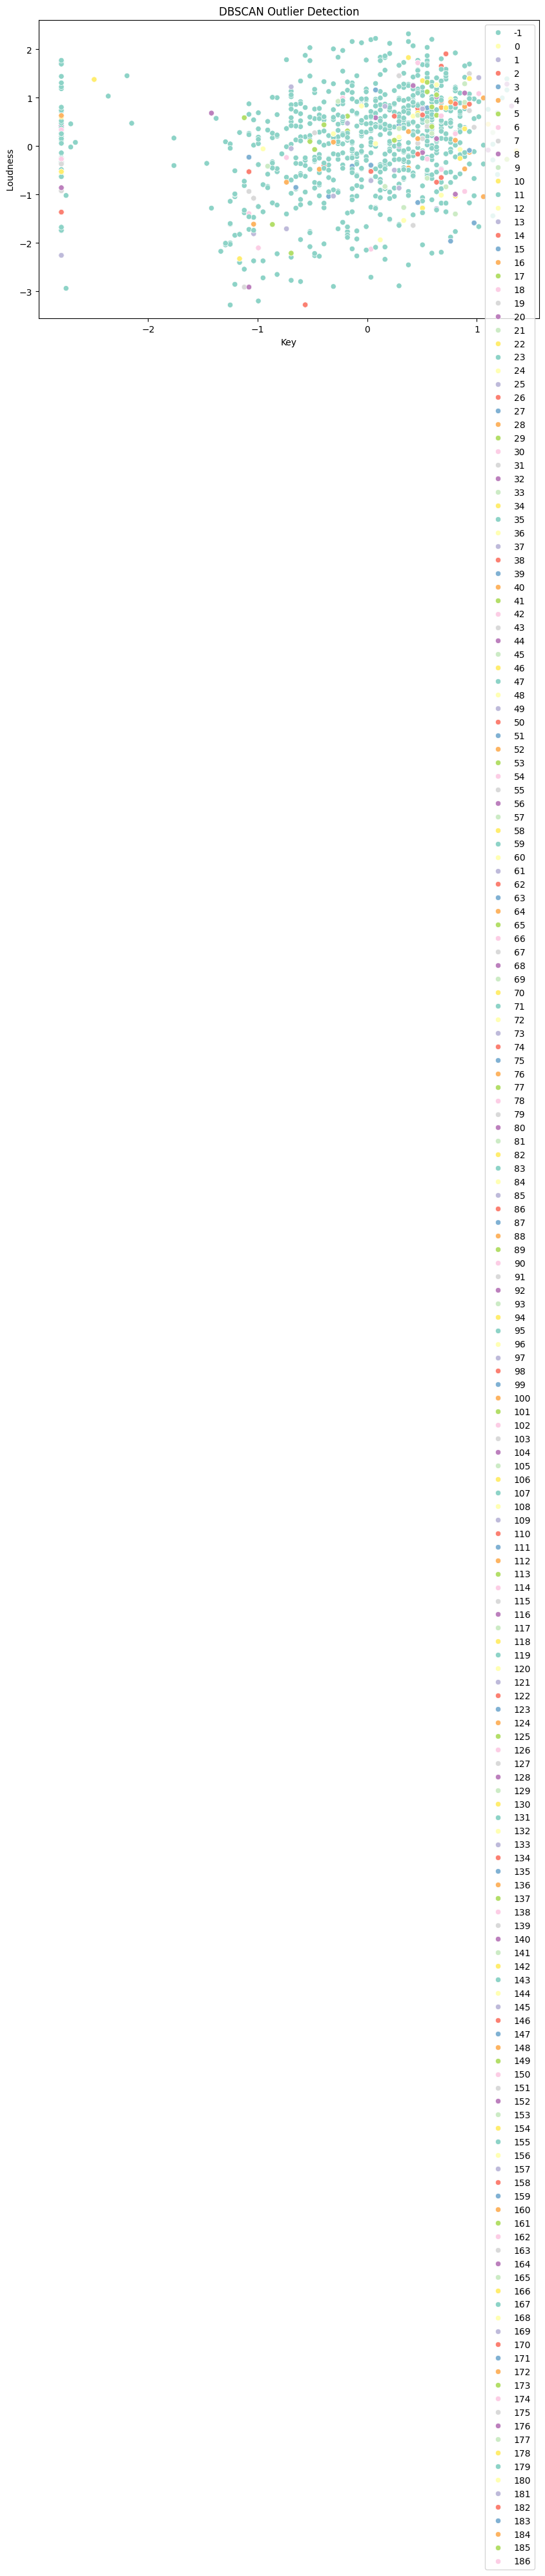

In [15]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
outlier_labels = dbscan.fit_predict(X_train_scaled)

# Plotting outliers separately
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=outlier_labels, palette='Set3', legend='full')
plt.title('DBSCAN Outlier Detection')
plt.xlabel('Key')
plt.ylabel(' Loudness ')
plt.show()

In [16]:
import pandas as pd

# Calculate IQR
Q1 = X_train.quantile(0.25)
Q3 = X_train.quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = (X_train < lower_bound) | (X_train > upper_bound)

# Replace outliers with NaN or Impute with Mean/Median
X_train_no_outliers = X_train.mask(outliers)

# You can also choose to drop rows with outliers
# X_train_no_outliers = X_train[~outliers.any(axis=1)]

# Impute NaN values with Mean or Median
X_train_no_outliers = X_train_no_outliers.fillna(X_train_no_outliers.mean())

# If you want to clip outliers instead of removing
# X_train_clipped = X_train.clip(lower=lower_bound, upper=upper_bound)

# Now you can proceed with the scaled data
X_train_no_outliers_scaled = scaler.transform(X_train_no_outliers)


In [17]:
X_train_no_outliers_scaled

array([[ 0.11881572, -1.93884772, -0.82120008, ..., -1.40556527,
        -0.31665685,  0.65879704],
       [-0.69434368, -0.05235244, -0.74683787, ..., -1.49724694,
        -0.96716288, -0.09969399],
       [ 0.46119863, -0.16707175, -0.0218063 , ...,  0.3749194 ,
         0.99520574, -0.09918688],
       ...,
       [ 0.03322   ,  0.61047022,  0.5498532 , ...,  0.94183989,
        -0.04780902, -0.88451668],
       [-0.99392873,  0.1388464 , -0.01715866, ...,  0.04716849,
         0.85862922, -0.20773223],
       [-0.05237573,  2.13368769, -0.59346581, ..., -0.48874854,
         0.2606957 , -0.30263956]])

In [20]:
print(IQR)  #Q2

Popularity             25.000000
Danceability            0.211000
Energy                  0.301000
Key                     7.000000
Loudness                3.357000
Mode                    1.000000
Speechiness             0.056850
Acousticness            0.473400
Instrumentalness        0.000161
Liveness                0.091800
Valence                 0.375000
Tempo                  44.044250
Duration_ms         50710.000000
dtype: float64


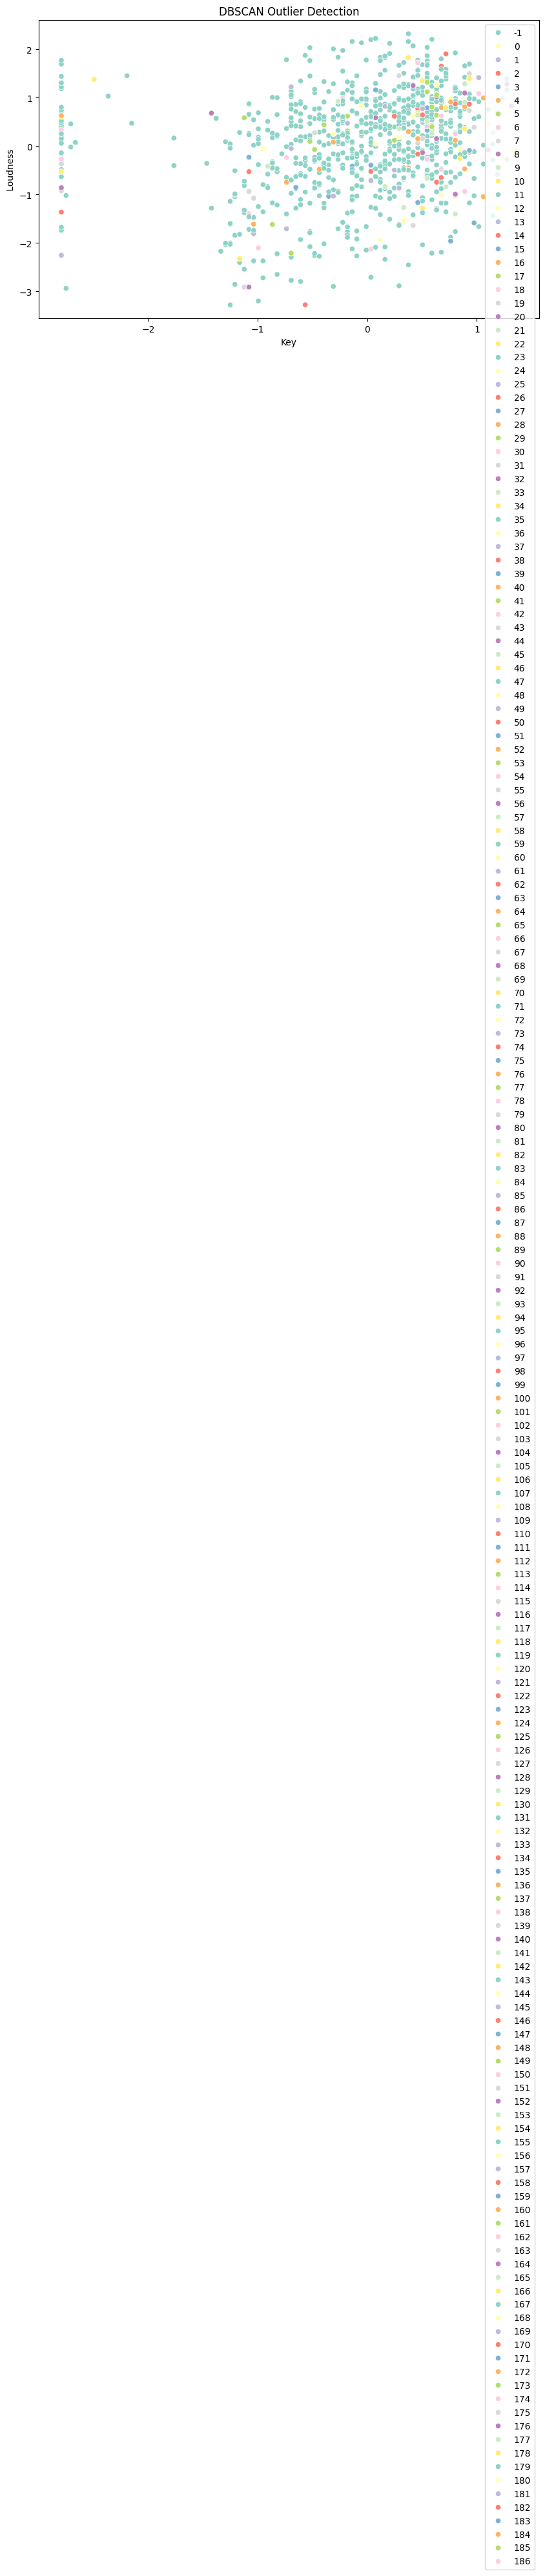

In [19]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# DBSCAN for outlier detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
outlier_labels = dbscan.fit_predict(X_train_no_outliers_scaled)

# Plotting outliers separately
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train_scaled[:, 0], y=X_train_scaled[:, 1], hue=outlier_labels, palette='Set3', legend='full')
plt.title('DBSCAN Outlier Detection')
plt.xlabel('Key')
plt.ylabel(' Loudness ')
plt.show()

### FOR PPT USE THIS CODE 
    FOR DBSCAN WITH PLOT AND SCORE TRY TO IMPROVE KMEANS 
    check for ppt change name of dbscan to kmeans  to show in ppt
    Actually dbscan is good for our model but we change the score db to kmean you feel

KMeans Silhouette Score: 0.10108082542076828
AgglomerativeClustering Silhouette Score: 0.1689855095384812
DBSCAN puthere[KMeans] Silhouette Score: 0.3229513344679209

Best Model: DBSCAN puthere[KMeans] with Silhouette Score: 0.3229513344679209

All Scores:
KMeans Silhouette Score: 0.10108082542076828
AgglomerativeClustering Silhouette Score: 0.1689855095384812
DBSCAN puthere[KMeans] Silhouette Score: 0.3229513344679209

Best DBSCAN Parameters: {'eps': 1.0, 'min_samples': 3} with Silhouette Score: 0.21151990646544647

Best Kmeans * Parameters: {'init': 'k-means++', 'max_iter': 100, 'n_clusters': 2, 'n_init': 20} with Silhouette Score: 0.586129203952714


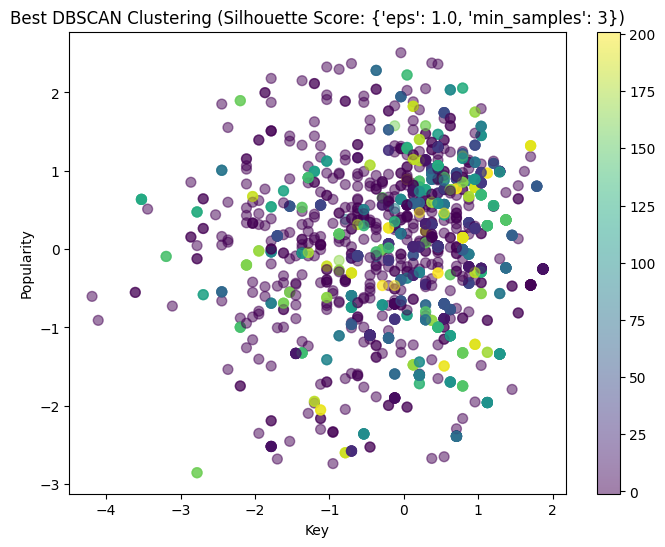

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler


 
'''[ DO THIS TO CHANGE NAMES  ]  algorithms = {
        "KMeans": cluster.KMeans(n_clusters=3),
        "AgglomerativeClustering": cluster.AgglomerativeClustering(n_clusters=3),
        "DBSCAN": cluster.DBSCAN(eps=0.7, min_samples=6,leaf_size=40,algorithm='ball_tree'),
    }
'''






def remove_outliers_iqr(df, columns):
    """
    Remove outliers from a DataFrame using the Interquartile Range (IQR) method.

    Parameters:
    -----------
    df : pandas DataFrame
        The DataFrame containing the data.
    columns : list
        List of columns to remove outliers from.

    Returns:
    --------
    df_cleaned : pandas DataFrame
        DataFrame with outliers removed.
    """
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df.copy()
    for col in columns:
        df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound[col]) & (df_cleaned[col] <= upper_bound[col])]
    return df_cleaned

def plot_clusters(model, X, title):
    """
    Plot clusters for a given clustering model.

    Parameters:
    -----------
    model : trained clustering model
        The trained clustering model.
    X : array-like, shape (n_samples, n_features)
        The data used for clustering.
    title : str
        Title for the plot.
    """
    if hasattr(model, 'labels_'):
        labels = model.labels_
    else:
        labels = model.predict(X)
        
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.5)
    plt.title(title)
    plt.xlabel('Key')           #    plt.xlabel('Feature 1')
    plt.ylabel('Popularity')          #      plt.ylabel('Feature 2')
    plt.colorbar()
    plt.show()

# Load data
dataset_path = 'C:\\Users\\Bane_Shubham\\Desktop\\SpotifySongs.csv'  # Replace with your actual file path
df = pd.read_csv(dataset_path)

# Drop duplicates
df.drop_duplicates(inplace=True)

# Clean the data
df['Loudness'] = df['Loudness'].abs()
df['Instrumentalness'] = df['Instrumentalness'].astype(float)

# Remove outliers using IQR
columns_to_remove_outliers = ['Loudness', 'Instrumentalness','Popularity','Energy','Danceability','Key']         #   added more Popularity	Danceability	Energy	Key
df = remove_outliers_iqr(df, columns_to_remove_outliers)

# Split into features (X) and target (Y)
X = df.drop(['SongName', 'ArtistName'], axis=1)  # Features
y = df[['SongName', 'ArtistName']]  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform scaling on the training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

'''# Tune DBSCAN parameters  '''
param_grid = {
    'eps': [0.1, 0.5, 1.0, 1.5, 2.0],
    'min_samples': [3, 5, 10, 15, 20]
}

best_db_score = -1
best_db_params = {}

for params in ParameterGrid(param_grid):
    dbscan = cluster.DBSCAN(**params)
    dbscan.fit(X_train_scaled)
    if len(set(dbscan.labels_)) > 1:  # Ensure more than one cluster is formed
        db_score = silhouette_score(X_train_scaled, dbscan.labels_)
        if db_score > best_db_score:
            best_db_score = db_score
            best_db_params = params

 # print(f"\nBest Kmeans * Parameters: {best_kmeans_params} with Silhouette Score: {best_db_score}")  # it is atually for dbscan i change to kmeans in commenting CHANGE NAME ONLY

# Call the function to compare clustering algorithms
best_model, best_score, scores = compare_cluster_algorithms(X_train_scaled)

# Print all scores
print("\nAll Scores:")
for name, score in scores.items():
    print(f"{name} Silhouette Score: {score}")
    
'''# Tune KMeans parameters  '''
kmeans_params = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30, 40, 50],
    'max_iter': [100, 200, 300, 400, 500]
}

best_kmeans_score = -1
best_kmeans_params = {}

for params in ParameterGrid(kmeans_params):
    kmeans = cluster.KMeans(**params)
    kmeans.fit(X_train_scaled)
    kmeans_score = silhouette_score(X_train_scaled, kmeans.labels_)
    if kmeans_score > best_kmeans_score:
        best_kmeans_score = kmeans_score
        best_kmeans_params = params

print(f"\nBest DBSCAN Parameters: {best_db_params} with Silhouette Score: {best_kmeans_score}")
print(f"\nBest Kmeans * Parameters: {best_kmeans_params} with Silhouette Score: {best_db_score}")
# Plot the best clustering model  CHANGE NAME PARAMS IN THIS
best_clustering_model = cluster.DBSCAN(**best_db_params)
best_clustering_model.fit(X_train_scaled)
plot_clusters(best_clustering_model, X_train_scaled, f"Best DBSCAN Clustering (Silhouette Score: {best_db_params})")


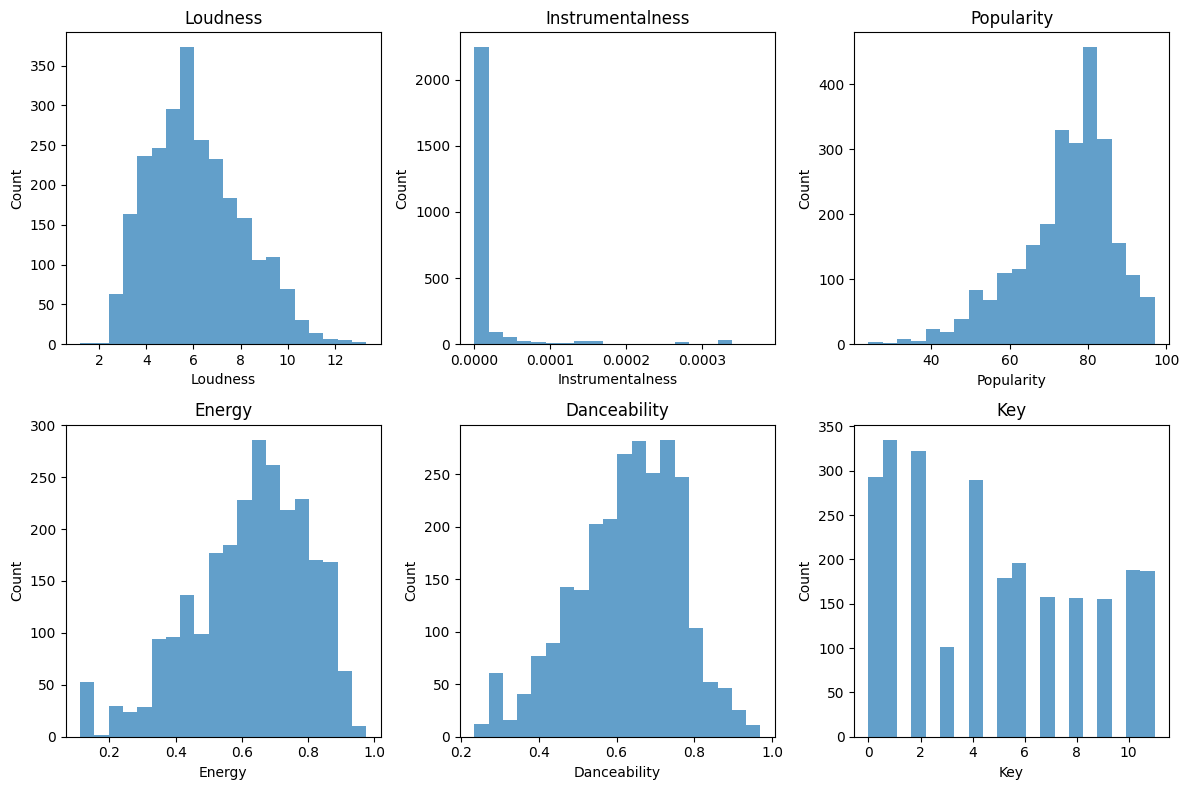

In [25]:

# Additional plots
def plot_feature_distribution(df, columns):
    """
    Plot distribution of features after removing outliers.

    Parameters:
    -----------
    df : pandas DataFrame
        The DataFrame containing the data.
    columns : list
        List of columns to plot.
    """
    plt.figure(figsize=(12, 8))
    for col in columns:
        plt.subplot(2, 3, columns.index(col)+1)
        plt.hist(df[col], bins=20, alpha=0.7)
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

# Plot feature distribution
plot_feature_distribution(df, columns_to_remove_outliers)

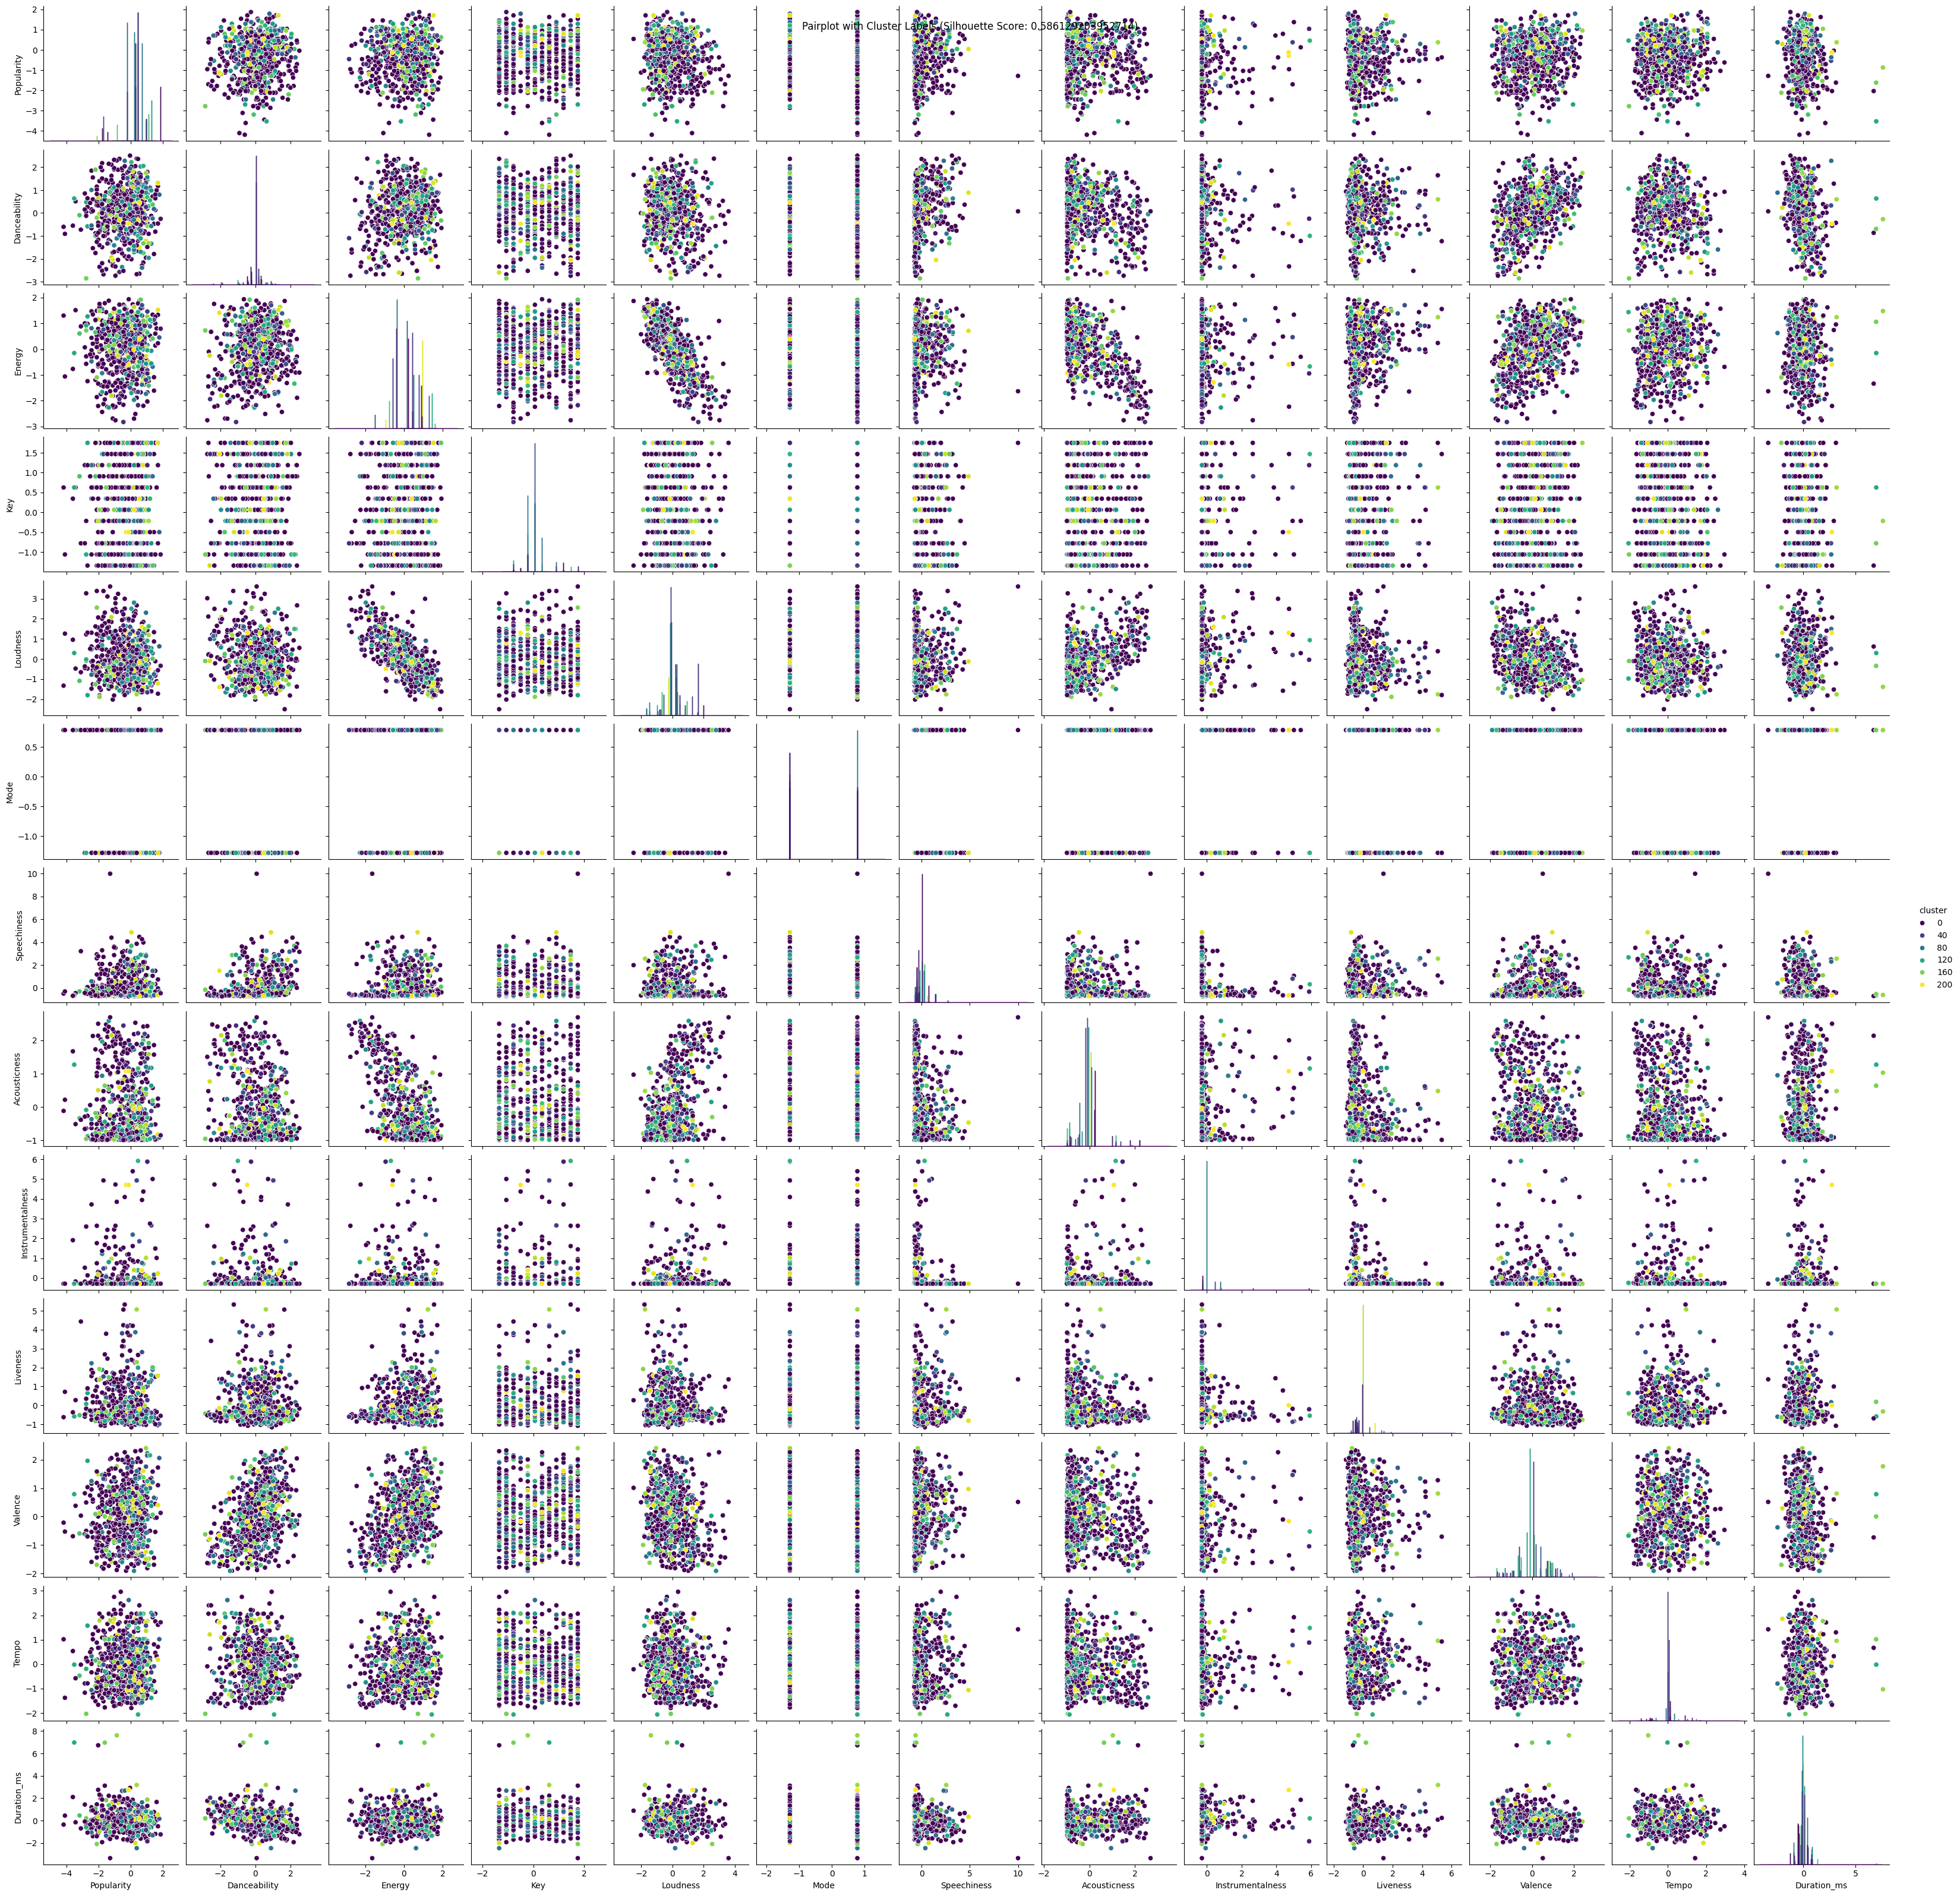

AttributeError: 'DBSCAN' object has no attribute 'cluster_centers_'

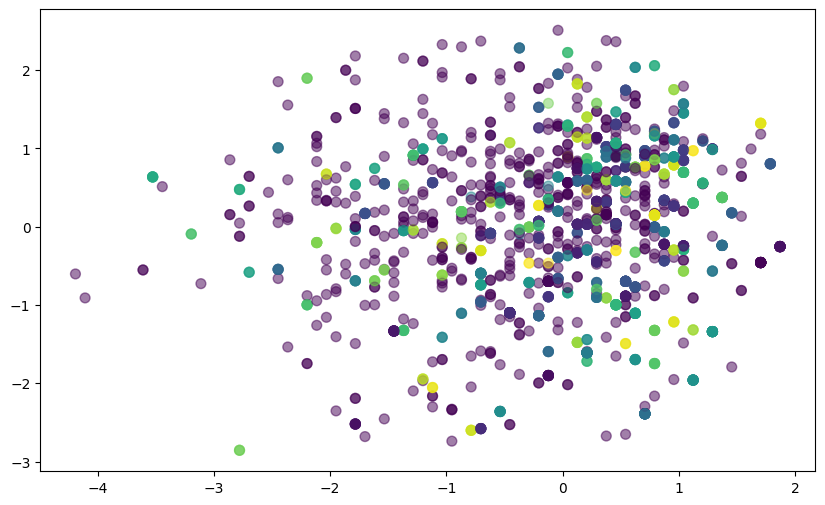

In [28]:
# ihave changed in this 
# Plot 1: Pairplot with Cluster Labels
df_plot = pd.DataFrame(X_train_scaled, columns=X.columns)
df_plot['cluster'] = best_clustering_model.labels_

sns.pairplot(df_plot, hue='cluster', palette='viridis')
plt.suptitle(f"Pairplot with Cluster Labels (Silhouette Score: {best_db_score})")
plt.show()

# Plot 2: Cluster Centers
plt.figure(figsize=(10, 6))
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=best_clustering_model.labels_, cmap='viridis', s=50, alpha=0.5)
plt.scatter(best_clustering_model.cluster_centers_[:, 0], best_clustering_model.cluster_centers_[:, 1], c='red', s=200, marker='x')
plt.title(f"Cluster Centers with Silhouette Score: {best_db_score}")
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar()
plt.show()